# CSCI567 Machine Learning Course Project
by Xin Miao, Spring 2018
## Project aim
Classification of handwritten digits using major machine learning algorithms. 
## Outline of this presentation
Section 1. Import python packages<br>
Section 2. Explore the data<br>
Section 3. Evaluation metric<br>
Section 4. **Logistic regression**<br>
Section 5. **Perceptron**<br>
Section 6. **Convolutional neural network**<br>
Section 7. **Support vector machine**<br>
Section 8. **Boosting**<br>
Section 9. **K-means**<br>
## About the data
- The dataset is stored in a JSON-format file mnist_subset.json. 
- You can access its training, validation, and test splits using the keys ‘train’, ‘valid’, and ‘test’, respectively. For example, suppose we load to the variable $x$. Then, $x$ refers to the training set of mnist subset. This set is a list with two elements: $x['train'][0]$ containing the features of size $N$ (samples)$\rightarrow$ $D$ (dimension of features), and  $x['train'][1]$ containing the corresponding labels of size N.
- Each Sample is a **28-by-28** grey-scaled image. Therefore, the feature vector length is **784**, and each element in the vector represents one pixel of the image.<br>


# S1. Python Packages

In [1]:
import numpy as np
import scipy as sp
import json

from matplotlib import pyplot as plt

# S2. Data Exploration

In [2]:
from data_loader import data_loader_mnist
X_train, y_train, X_valid, y_valid, X_test, y_test = data_loader_mnist()
n_classes = np.unique(y_train).shape[0]

In [3]:
print('Dimension of feature space: %d' % (X_train.shape[1]))
print('Number of training samples: %d' % (X_train.shape[0]))
print('Number of validation samples: %d' % (X_valid.shape[0]))
print('Number of test samples: %d' % (X_test.shape[0]))

Dimension of feature space: 784
Number of training samples: 5000
Number of validation samples: 1000
Number of test samples: 1000


In [4]:
print('Labels:')
print(np.unique(y_train))
print('Value range of feature vectors: \n[%f, %f]' % (np.min(X_train), np.max(X_train)))

Labels:
[0 1 2 3 4 5 6 7 8 9]
Value range of feature vectors: 
[0.000000, 0.996094]


This handwritten digit is recognized as  7


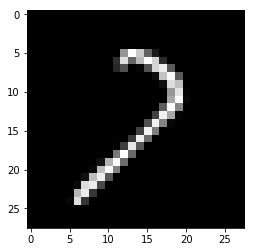

This handwritten digit is recognized as  6


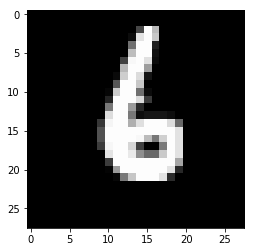

This handwritten digit is recognized as  4


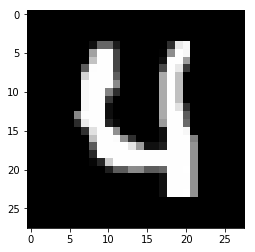

In [5]:
# Display some images
from PIL import Image

for i in range(0,3):
    print('This handwritten digit is recognized as  '+str(y_train[i]))
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray')
    plt.show()

# S3. Evaluation Metric
The accuracy of prediction is evaluated as (number of correct prediction)/(total number of test cases)x100%

In [6]:
from sklearn.metrics import accuracy_score

# S4. Logistic regression
**Algorithm**: <br>
Multinomial logistic regression. K binary classifiers are trained, and each point is assigned to the class that maximizes the conditional probability: $$p(y==k|x)=\frac{e^{w_k^T x}}{\Sigma_{k'}{e^{w_{k'}^T x}}}$$ $$k^* =  \underset{k}{{arg\,max}}\,p(y==k|x)$$<br>
**Hyper-parameters**:<br>
    - Number of classes
    - Step size of gradient descent
    - Maximum iterations
    - Error tolerance
See implementation details in logistic.py <br>
Details on the derivation of gradient can be found here:<br>
https://www.quora.com/What-is-the-gradient-of-the-log-likelihood-function-in-multinomial-logistic-regression

In [7]:
from logistic import LogisticCLF

logistic = LogisticCLF(n_classes=n_classes, step_size=0.5, max_iter=10, e=0.0001)

print('Multinomial:')
w, b = logistic.train(X_train, y_train)
train_preds = logistic.predict(X_train, w=w, b=b)
preds = logistic.predict(X_test, w=w, b=b)

print('train acc: %f, test acc: %f' % 
    (accuracy_score(y_train, train_preds),
     accuracy_score(y_test, preds)))

Multinomial:
Iter: 0,  Error: 0.612800

Iter: 1,  Error: 0.785800

Iter: 2,  Error: 0.772800

Iter: 3,  Error: 0.799600

Iter: 4,  Error: 0.798000

Iter: 5,  Error: 0.810200

Iter: 6,  Error: 0.813400

Iter: 7,  Error: 0.820800

Iter: 8,  Error: 0.828000

Iter: 9,  Error: 0.832400

train acc: 0.832400, test acc: 0.834000


# S5. Convolutional Neural Network
**Algorithm**:<br>
    A two-convolutional-layer CNN. Structure looks like this:
    ![alt text](cnn2.png "Two-layer CNN")
**Hyper-parameters**:<br>
    - Learning rate
    - Alpha
    - Stochastic gradient descent related: Number of epoch, size of minibatch
Implementation details in dnn_cnn.py, dnn_misc.py

In [11]:
from dnn_cnn import CNN
X_train, y_train, X_valid, y_valid, X_test, y_test = data_loader_mnist()
cnn = CNN(random_seed=2, learning_rate=0.01, alpha=0.0, num_epoch=3, minibatch_size=5)

X_train = np.array(X_train).reshape(-1, 1, 28, 28)
X_valid = np.array(X_valid).reshape(-1, 1, 28, 28)
X_test = np.array(X_test).reshape(-1, 1, 28, 28)

print(X_train.shape)

model = cnn.train(X_train, y_train, X_valid, y_valid)
train_preds = cnn.predict(X_train, model)
preds = cnn.predict(X_test, model)

print('train acc: %f, test acc: %f' % 
    (accuracy_score(y_train, train_preds),
     accuracy_score(y_test, preds)))

(5000, 1, 28, 28)
At epoch 1
Training loss at epoch 1 is 0.39174589169764024
Training accuracy at epoch 1 is 0.8962
Validation accuracy at epoch 1 is 0.913
At epoch 2
Training loss at epoch 2 is 0.26461930570626463
Training accuracy at epoch 2 is 0.9246
Validation accuracy at epoch 2 is 0.937
At epoch 3
Training loss at epoch 3 is 0.20831313341923516
Training accuracy at epoch 3 is 0.9388
Validation accuracy at epoch 3 is 0.951
train acc: 0.938800, test acc: 0.950000


# S6. Support Vector Machine
**Algorithm**:<br>
![alt text](image_files/pegasos.png "Pegasos")
**Hyperparameters**:<br>
    - K: size of minibatch
    - Lambda: regularization parameter. This controls the tolerance of error
    - Maximum iterations
Implementation details in pegasos.py

In [12]:
from pegasos import SVM
X_train, y_train, X_valid, y_valid, X_test, y_test = data_loader_mnist()

svm = SVM(num_classes=n_classes, k=100, max_iterations=500, lamb=0.001, t=0.)

X_train = np.hstack((np.ones((len(X_train), 1)), np.array(X_train)))
X_valid = np.hstack((np.ones((len(X_valid), 1)), np.array(X_valid)))
X_test = np.hstack((np.ones((len(X_test), 1)), np.array(X_test)))

w_svm = svm.OVR_train(X_train, y_train)
train_preds = svm.OVR_predict(X_train, w_svm)
preds = svm.OVR_predict(X_test, w_svm)

print('train acc: %f, test acc: %f' % 
    (accuracy_score(y_train, train_preds),
     accuracy_score(y_test, preds)))

[6 0 6 6 5 1 5 0 2]
[6 4 6 6 5 1 5 7 2]
train acc: 0.857600, test acc: 0.833000


# S7. Boosting
**Algorithm**:<br>
![alt text](image_files/adaboost.png "adaboost")
**Hyper-parameters**:<br>
    - Pool of simple classifiers
    - Maximum iterations
Implementation details in boosting.py

In [7]:
import decision_stump
import boosting

X_train, y_train, X_valid, y_valid, X_test, y_test = data_loader_mnist()

# set a pool of "stupid" classifiers
h_set = set()
s_set = {1, -1}
b_set = set(np.linspace(0, 10, 51))
d_set = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
for s in s_set:
    for b in b_set:
        for d in d_set:
            print(type(s))
            # h_set.add(decision_stump.DecisionStump(s,b,d))

# training
ada = boosting.AdaBoost(h_set, T=30)
ada.train(X_train, y_train)
train_preds = ada.predict(X_train1, w_svm)
preds = ada.predict(X_test1, w_svm)

print('train acc: %f, test acc: %f' % 
    (accuracy_score(y_train, train_preds),
     accuracy_score(y_test, preds)))

SyntaxError: invalid syntax (decision_stump.py, line 7)

# S8. K-means
Algorithm:<br>
![alt text](image_files/kmeans.png "kmeans")
Implementation details in kmeans.py

In [15]:
from kmeans import KMeans, KMeansClassifier

X_train, y_train, X_valid, y_valid, X_test, y_test = data_loader_mnist()

kmeans = KMeansClassifier(n_cluster=40, max_iter=300, e=1e-6)

kmeans.fit(X_train, y_train)
train_preds = kmeans.predict(X_train)
preds = kmeans.predict(X_test)

print(train_preds[1:10])
print(y_train[1:10])
print('train acc: %f, test acc: %f' % 
    (accuracy_score(y_train, train_preds),
     accuracy_score(y_test, preds)))

[6 4 6 6 5 1 5 7 2]
[6 4 6 6 5 1 5 7 2]
train acc: 0.659800, test acc: 0.671000
